# EasyVisa Project


## Context:
Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description
The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status: Flag indicating if the Visa was certified or denied

# Method:

This analysis will be conducted by building various Bagging (such as Decision Tree, Bagging Classifier and Random Forest) and Boosting (Such as Ada Boost and Gradient Boost) models, improve on the models by applying hyperparameter tuning techniques,building a Stacking Classifier,comparing all built models and deciding on the best model for the visa approval processing predictions.

I chose to use Bagging and Boosting models in order to achieve regularisation and prevent overfitting of my models. This will ensure the reliability of my model predictions and ensure robustness and stability of the models. 

First, I will view and explore my data set to understand distributions and relationships between variables and their impact on visa status, then I go on to preprocessing and preparing my data for modelling before going further to build the classification models, hyper tuning the models and comparing their performances using various metrics such as F1 score, precision and Recall and deciding the best model to be implemented.

#### I will start by importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries with different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

### Import Dataset

In [2]:
visa = pd.read_csv("EasyVisa.csv") # Read the data

In [3]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

### Data overview

In [4]:
data.head()  # To view the first 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
data.tail()  # To view last 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [6]:
data.shape  # View dimensions of the data, Understanding the shape of the dataset

(25480, 12)

The dataset has 25480 rows and 12 columns

In [7]:
data.info() #Check the data types of the columns for the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Observations :

-   There are no null values in the dataset as the number of non-null values of each column is equal to the number of total rows in the dataset. I can further confirm this using isna() method.

-  Of the 12 columns in the dataset, 9 columns are of object data type and the remaining 3 columns are numeric data types (1 float and 2 integar

-  I can convert the object type columns to categories. converting "objects" to "category" reduces the data space required to store the dataframe

In [8]:
# checking for duplicate values
data.isna().sum()  

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no missing values in the data

In [9]:
cols = data.select_dtypes(["object"])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [10]:
# converting object data type to category data type
for i in cols.columns:
    data[i] = data[i].astype("category")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


After conversion of object to category data types, memory usage has reduced from 2.3 to 2.0 MB

In [12]:
# checking for duplicate values
data[data.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no duplicate values in the data

## Exploratory Data Analysis

**Checking the statistical summary of the data.**

In [13]:
data.describe().T  # Print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


-  Number of employees has minimum value of -26000, this might be an error. median value of 2109, mean of 5667 and maximum value of 602069. Looking at the data distribution, distance between 75th percentile and maximum, I should expect to see lots of outliers in this distribution.
-  Year of establishment is earliest 1800 and latest 2016
-  Prevailing wage has a minimum value of 2.14, mean of 74,455.81, median of 70,308.21 and maximum 319.210.27. This distribution is also expected to have outliers.

In [14]:
data.describe(include=["category"]).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


-  The case ID is a unique serial numbering for each case. It will not add any value to the analysis and so will be dropped
-  There are 6 continents with Asia having the highest number of cases in the dataset
-  There are 4 types of Education with Bachelor's having the highest number of cases
-  Applicants with job experience, applicants that do not require job training and full time position variabbles have the higher frequency in the dataset
-  Certified case studies are more than denied case studies

**Fixing the negative values in number of employees columns**

In [15]:
data.loc[data.no_of_employees < 0].shape  # Check negative values in the employee column

(33, 12)

There are 33 rows of data with negative values in the column of Number of employees in the employer's company

In [16]:
# taking the absolute values for number of employees
data["no_of_employees"] = abs(
    data["no_of_employees"]
)  # function to convert the values to a positive number

In [17]:
data.loc[data.no_of_employees < 0].shape[0]

0

All negative values in the no_of_employees column have now been converted to positive numbers 

**Checking the count of each unique category in each of the categorical variables.** 

In [18]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("category").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV25287    1
EZYV25285    1
EZYV25284    1
EZYV25283    1
            ..
EZYV17633    1
EZYV17632    1
EZYV17631    1
EZYV17630    1
EZYV9999     1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

-  There are 6 categories in continent variable with Asia having the highest number of observations and Oceania having the least
- There are 4 categories of employee education. Bachelor's has the highest observations and Doctorate is least
- There are more employees with job experience and there are more employees not requiring job training
- Northeast has the highest number of observations and Island is least
- There are more full time positions than not
- There are more certified cases than denied

In [19]:
# checking the number of unique values
data[
    "case_id"
].nunique  # Check unique values in the case_id column

<bound method IndexOpsMixin.nunique of 0           EZYV01
1           EZYV02
2           EZYV03
3           EZYV04
4           EZYV05
           ...    
25475    EZYV25476
25476    EZYV25477
25477    EZYV25478
25478    EZYV25479
25479    EZYV25480
Name: case_id, Length: 25480, dtype: category
Categories (25480, object): ['EZYV01', 'EZYV02', 'EZYV03', 'EZYV04', ..., 'EZYV9996', 'EZYV9997', 'EZYV9998', 'EZYV9999']>

In [20]:
data.drop(
    ["case_id"], axis=1, inplace=True
)  # Dropping 'case_id' column from the data because it is just a serial numbering and adds no value to the data 

### Univariate Analysis

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on number of employees

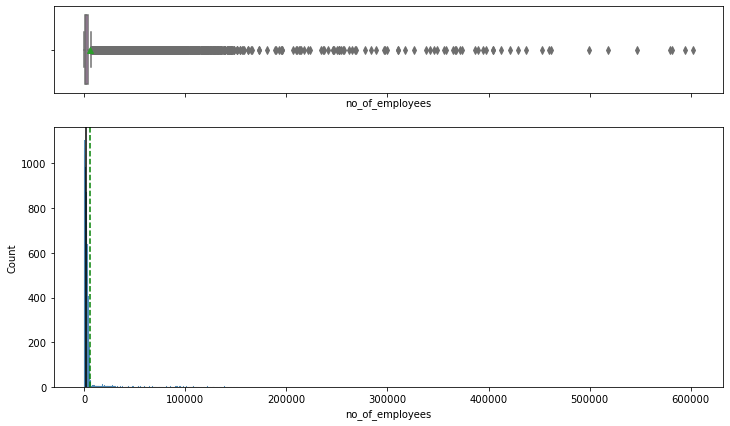

In [22]:
histogram_boxplot(data, "no_of_employees")

The number of employees distribution has tons of outliers with minimum, median and mean values at around 26, 200 and 5,000 employees respectively, yet the maximum value extends all the way to over 600,000 employees

### Observations on prevailing wage

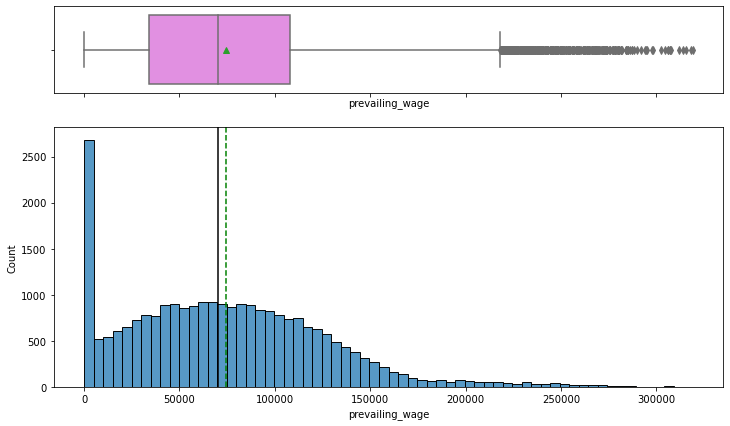

In [23]:
histogram_boxplot(
    data, "prevailing_wage"
)  # Histogram_boxplot for prevailing wage

- The prevailing wage distribution is highly right skewed with several outliers to the right wing
- It is observed that a lot (about 2,600) of observations lie at the minimum i.e less than 5,000 wage line
- The median and mean are close at about 70,000 and 74,000 wage line respectively, while maximum wage is at over 300,000

In [24]:
# checking the observations which have less than 100 prevailing wage
data.loc[
    data["prevailing_wage"] < 100
]  # Find the rows with less than 100 prevailing wage

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


About 176 rows of observations have prevailing wage of less than 100

In [25]:
data.loc[
    data["prevailing_wage"] < 100, "unit_of_wage"
].value_counts()  # Get the count of the values in the unit of wage where prevailing wage is less than 100

Hour     176
Month      0
Week       0
Year       0
Name: unit_of_wage, dtype: int64

All prevailing wage less than 100 are in the hour unit_of_wage

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on continent

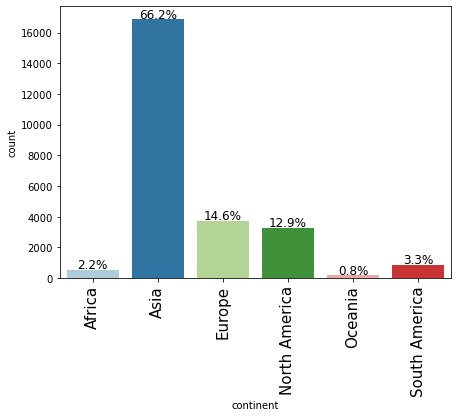

In [27]:
labeled_barplot(data, "continent", perc=True)

- 66.2% of employees in the data are from Asia followed by Europe with 14.6% and then North America with 12.9%
- Oceania has the least employees with only 0.8% represented in the data

### Observations on education of employee

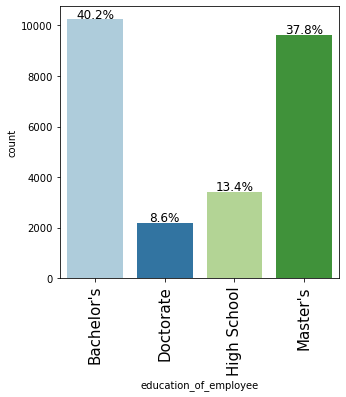

In [28]:
labeled_barplot(
    data, "education_of_employee", perc=True
)  

- 40.2% of employees have Bachelor's degree followed by 37.8% with Master's degree
- The least proportion is Doctorate with 8.6%

### Observations on job experience

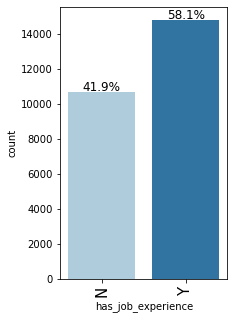

In [29]:
labeled_barplot(
    data, "has_job_experience", perc=True
)  

- ~58% of the employees have job experience while ~42% do not have job experience

### Observations on job training

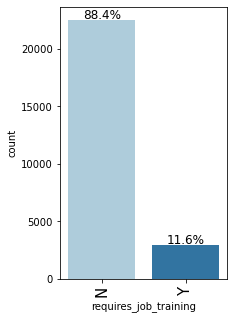

In [30]:
labeled_barplot(
    data, "requires_job_training", perc=True
)  

Majority of the employees do not have job experience up to 88.4% and only 11.6% of the employees require job training

### Observations on region of employment

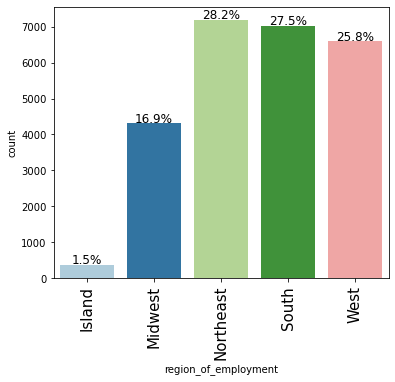

In [31]:
labeled_barplot(
    data, "region_of_employment", perc=True
)  

- Northeast, South and West regions have almost the same proportion of region of employment at 28.2%, 27.5% and 25.8% respectively
- Island region has the least proportion of employees' intended region of employment in the dataset

### Observations on unit of wage

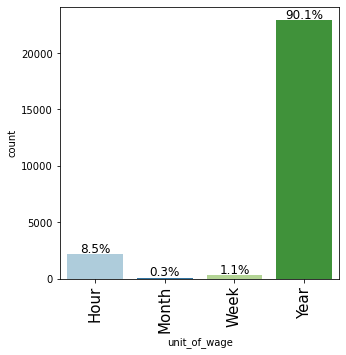

In [32]:
labeled_barplot(
    data, "unit_of_wage", perc=True
) 

- The most prevailing unit of wage is yearly at 90.1%, followed by hourly at 8.5%.
- Monthly and weekly wages together account for barely 1.5% of the data

### Observations on case status

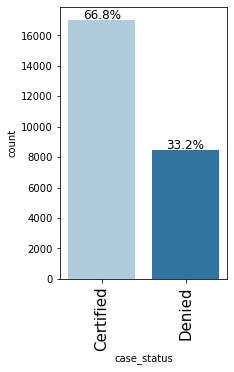

In [33]:
labeled_barplot(
    data, "case_status", perc=True
)  

- 66.8% of the visas were certified while 33.2% were denied

### Bivariate Analysis

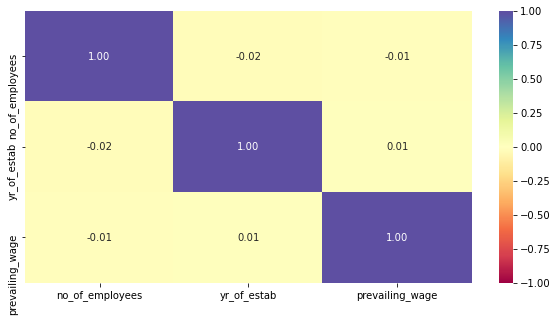

In [34]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)  # Find the correlation between the numerical variables
plt.show()

There is very low to no correlation amongst the numeric variables number of employees, year of establishment and prevailing wage

**Creating functions that will help us with further analysis.**

In [35]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [36]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Those with higher education may want to travel abroad for a well-paid job. Will find out if education has any impact on visa certification**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


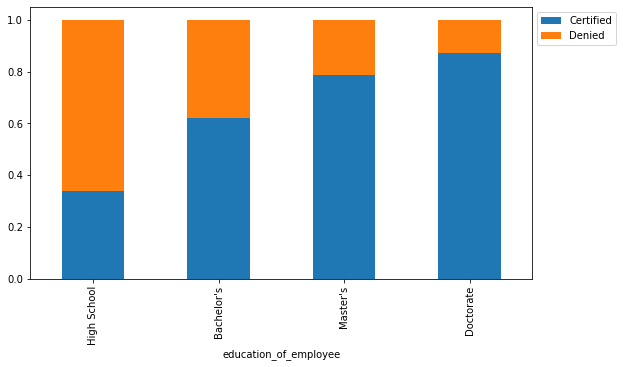

In [37]:
stacked_barplot(data, "education_of_employee", "case_status")

- It is observed that employees with Doctorate degrees get the least visa denial, followed by Master's and then Bachelors
- High School holders have the most denied Visa status in the data

**Different regions have different requirements of talent having diverse educational backgrounds. Will analyze it further**

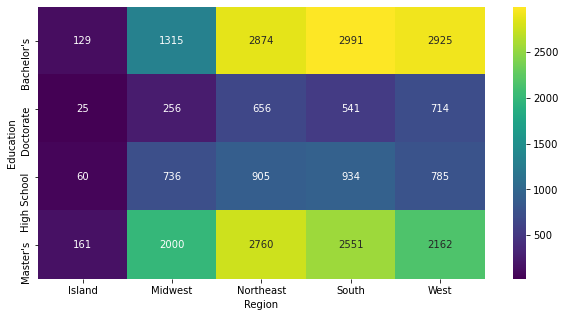

In [38]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)  # Plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()


- The region with the highest level of education is West, highest Masters is Northeast and highest Bachelors is South region

**Will have a look at the percentage of visa certifications across each region**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


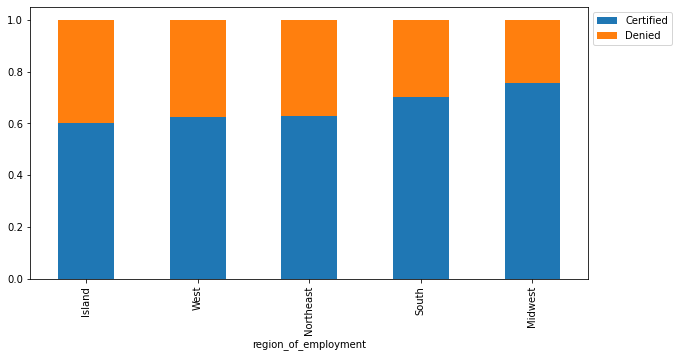

In [39]:
stacked_barplot(
    data, "region_of_employment", "case_status"
)  #Plotting stacked barplot for region of employment and case status

- Midwest region has the most certified and least denied visas across the regions. This is followed by the South region
- The Island, West and Northwest regions have similar proportions of certified/denied visas

**Similarly, will check for the continents and find out how the visa status vary across different continents.**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


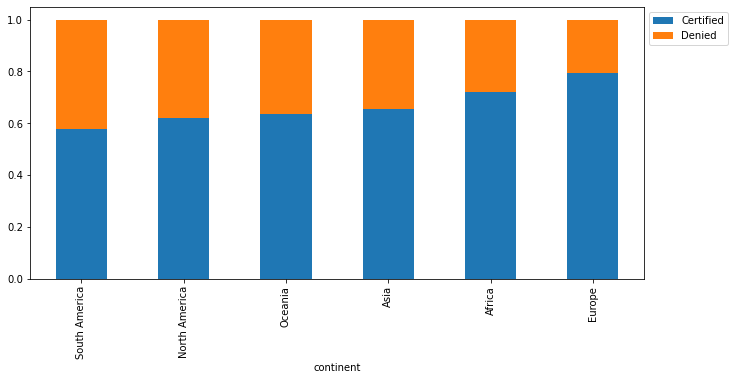

In [40]:
stacked_barplot(
    data, "continent", "case_status"
)  

- Europe has the highest proportion of certified and therefore least denied visas across the continents. This is followed by Africa and then Asia
- South America has the most denied visas across the continents

**Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Will see if having work experience has any influence over visa certification** 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


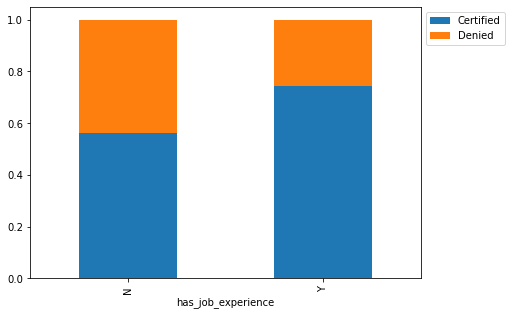

In [41]:
stacked_barplot(
    data, "has_job_experience", "case_status"
)  

The employees with job experience have less denied visa cases than employees without job experiences

**Do the employees who have prior work experience require any job training?**

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


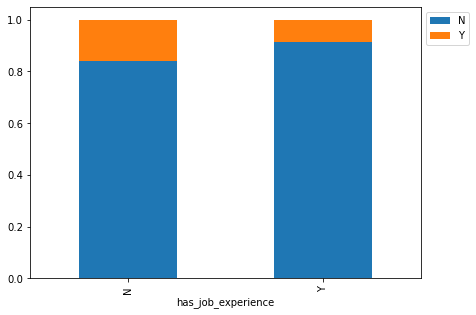

In [42]:
stacked_barplot(
    data, "has_job_experience", "requires_job_training"
)  

The employees with no job experience require more job training while employees with job experience require less job training

**Analying the data to see if visa status changes with the prevailing wage**

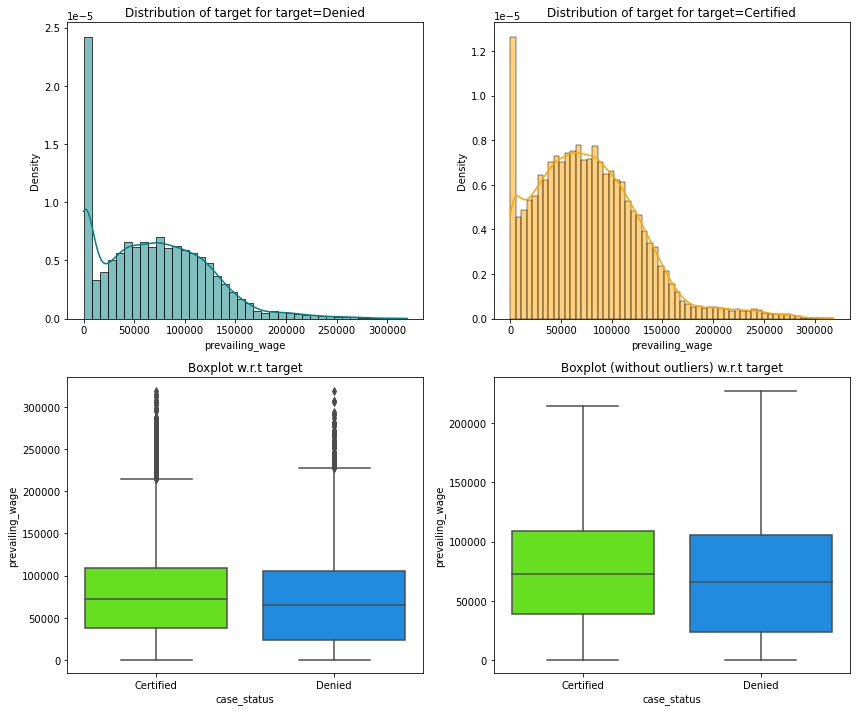

In [43]:
distribution_plot_wrt_target(
    data, "prevailing_wage", "case_status"
)  ## Find distribution of prevailing wage and case status

- Employees with higher prevailing wage have more certified visa status than employees with lower prevailing wage, although the diffrence in certified vs denied visas in this distribution is quite low

**Checking if the prevailing wage is similar across all the regions of the US**

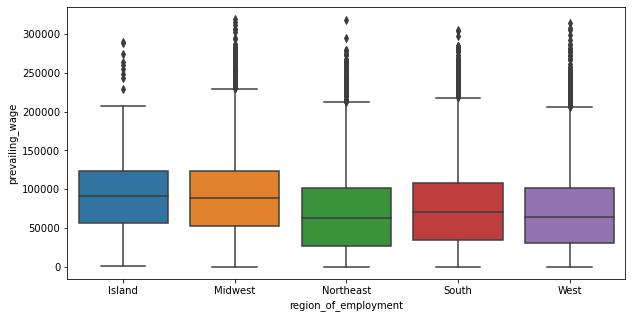

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data["region_of_employment"], data["prevailing_wage"]
)  
plt.show()

- The Island region generally has the highest average pravailing wage, closely followed by the Midwest region, and then South, then West and the Northwest region has the lowest average prevailing wage

**The prevailing wage has different units (Hourly, Weekly, etc). Will find out if it has any impact on visa applications getting certified.**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


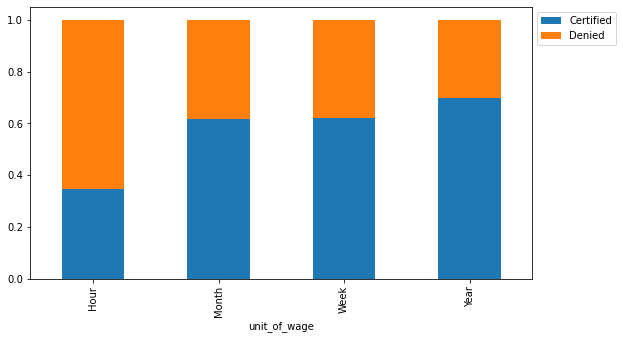

In [45]:
stacked_barplot(
    data, "unit_of_wage", "case_status"
)  

- The Yearly unit of prevailing wage has the least denied and invariable, most certified visa status
- Weekly and monthly wage units do not show any significant difference in visa certification and denial status
- The Hourly unit of wage has the most denied and least certified visas across the data

### Outlier Check

- Checking for outliers in the data.

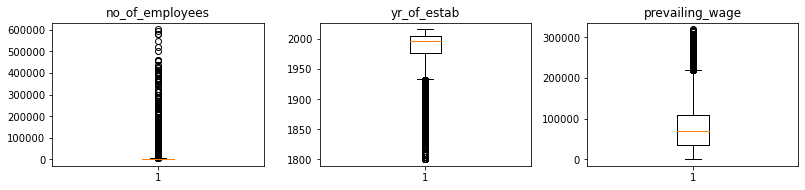

In [46]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(
        variable
    )  # Create boxplots for all the numeric columns
plt.show()

All 3 numeric columns have tons of outliers
- No of employees have a wide range from very small <50 employees to over 600,000 employees but these values are very possible depending on the type of organisation
- Yr of establishment also vary widely from established companies in the 1800s to new companies in the 2000s, these represent true values and are possibilities
- Prevailing wage of employees also vary widely as expected. Different factors impact employee wages such as level of education, years of experience, etc so these represent possible values

I am therefore not going to be treating outliers as these represent true and possible values

### Data Preparation for modeling

- I want to predict which visa will be certified.
- Before proceeding to build a model, I'll have to encode categorical features.
- I will then split the data into train and test to be able to evaluate the model that is built on the train data.

### Encoding categorical features

In [47]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [48]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(["case_status"], axis=1)  # Drop case status from the data since this is the target variable

Y = data["case_status"]


X = pd.get_dummies(X, drop_first=True)  # Create dummies for X

# Splitting data into train and test sets in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
) 

X=titanic.drop(['Survived'],axis=1) # Input variables
X_names = Features[1:] # Remove 'Survived' from feature names
y=titanic['Survived'] # Target variable
y_names=['Died','Survived'] # Target labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2, stratify=y)  

In [49]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


In [50]:
X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1


In [51]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


# Results:

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while other more qualifying candidates will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the organisation will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used as the metric for evaluation of the model, greater the F1  score, higher are the chances of minimizing False Negatives and False Positives. 
## the greater the F1-score, the higher the chances of predicting both classes correctly
* Balanced class weights will be used so that the model focuses equally on both classes.

In [52]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [53]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Model

In [54]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.33, 1: 0.67}, random_state=1
)  # Define decision tree classifier with random state = 1
model.fit(
    X_train, y_train
)  # Fit decision tree classifier on the train data

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

#### Checking model performance on training set

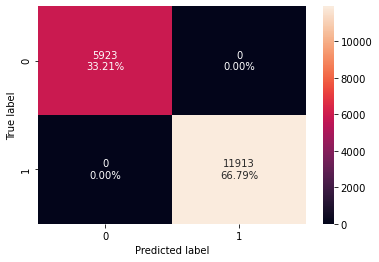

In [55]:
confusion_matrix_sklearn(
    model, X_train, y_train
)  # Create confusion matrix for train data

In [56]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)  # Check performance on train data
print("Training performance \n", decision_tree_perf_train)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


- Model is able to perfectly classify all the data points on the training set.
- 0 errors on the training set, each sample has been classified correctly.
- A decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
- This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

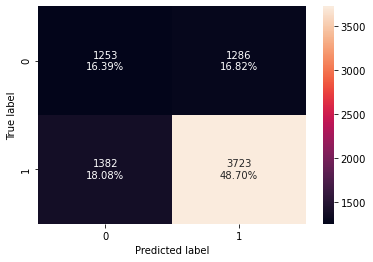

In [57]:
confusion_matrix_sklearn(
    model, X_test, y_test
)  # Create confusion matrix for test data

- 3723 (48.7%) visas were certified and the model correctly predicted them as certified : True Positive (observed=1,predicted=1)
- 1253 (16.39%) visas were denied and model correctly predicted them as denied : True Negative (observed=0,predicted=0) 
- 1286 (16.82%) visas were denied but the model wrongly predicted them as certified: False Positive (observed=0,predicted=1)
- 1382 (18.08%) visas were certified but model wrongly predicted them as denied: False Negative (observed=1,predicted=0)

In [58]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) # Check performance for test data
print("Testing performance \n", decision_tree_perf_test)


Testing performance 
    Accuracy    Recall  Precision        F1
0  0.650968  0.729285   0.743262  0.736207


- Decision tree model is performing fairly on test data for F1, Precision and Recall but is generalising poorly across all metrics as can be observed to be overfitting the training data
- I will check to see if I can reduce overfitting and improve performance on test data by tuning hyperparameters.

###  Vusualising the Decision Tree

In [59]:
feature_names = X_train.columns.to_list()

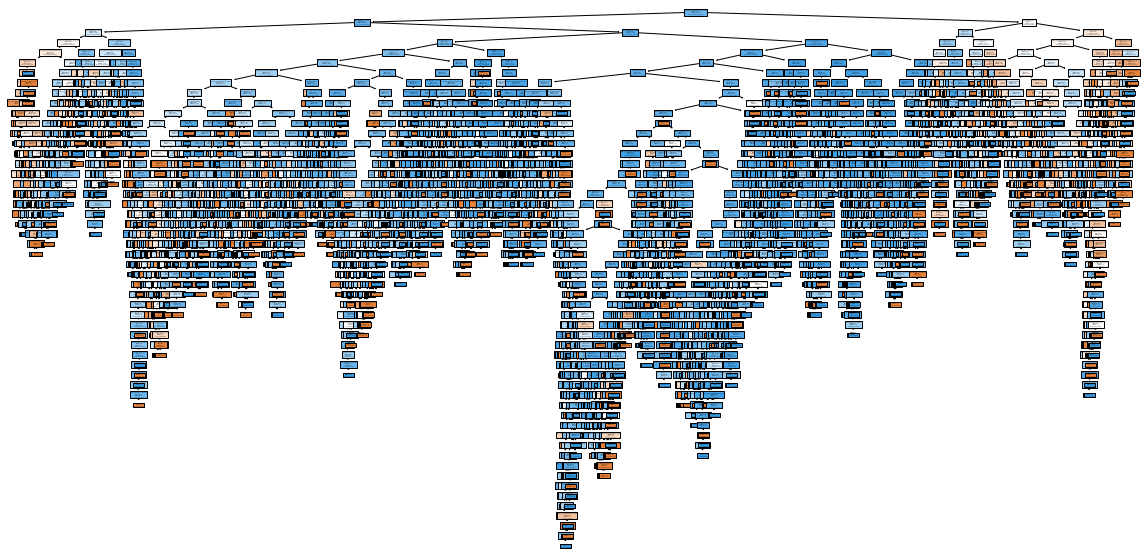

In [60]:
fig = plt.figure(figsize=(20,10))
out = tree.plot_tree(model,feature_names=feature_names,class_names=None,filled=True) 

The decision tree is Visually unappealing plotting with the default parameters of the decision tree classifier. Here, the classifier uses all the nodes of the tree and is generalising quite poorly as seen from the metric scores above. 
I will visualise this using a trimmed tree with defined parameters as below

In [61]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 3, random_state=7) # Choose tree depth

In [62]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=7)

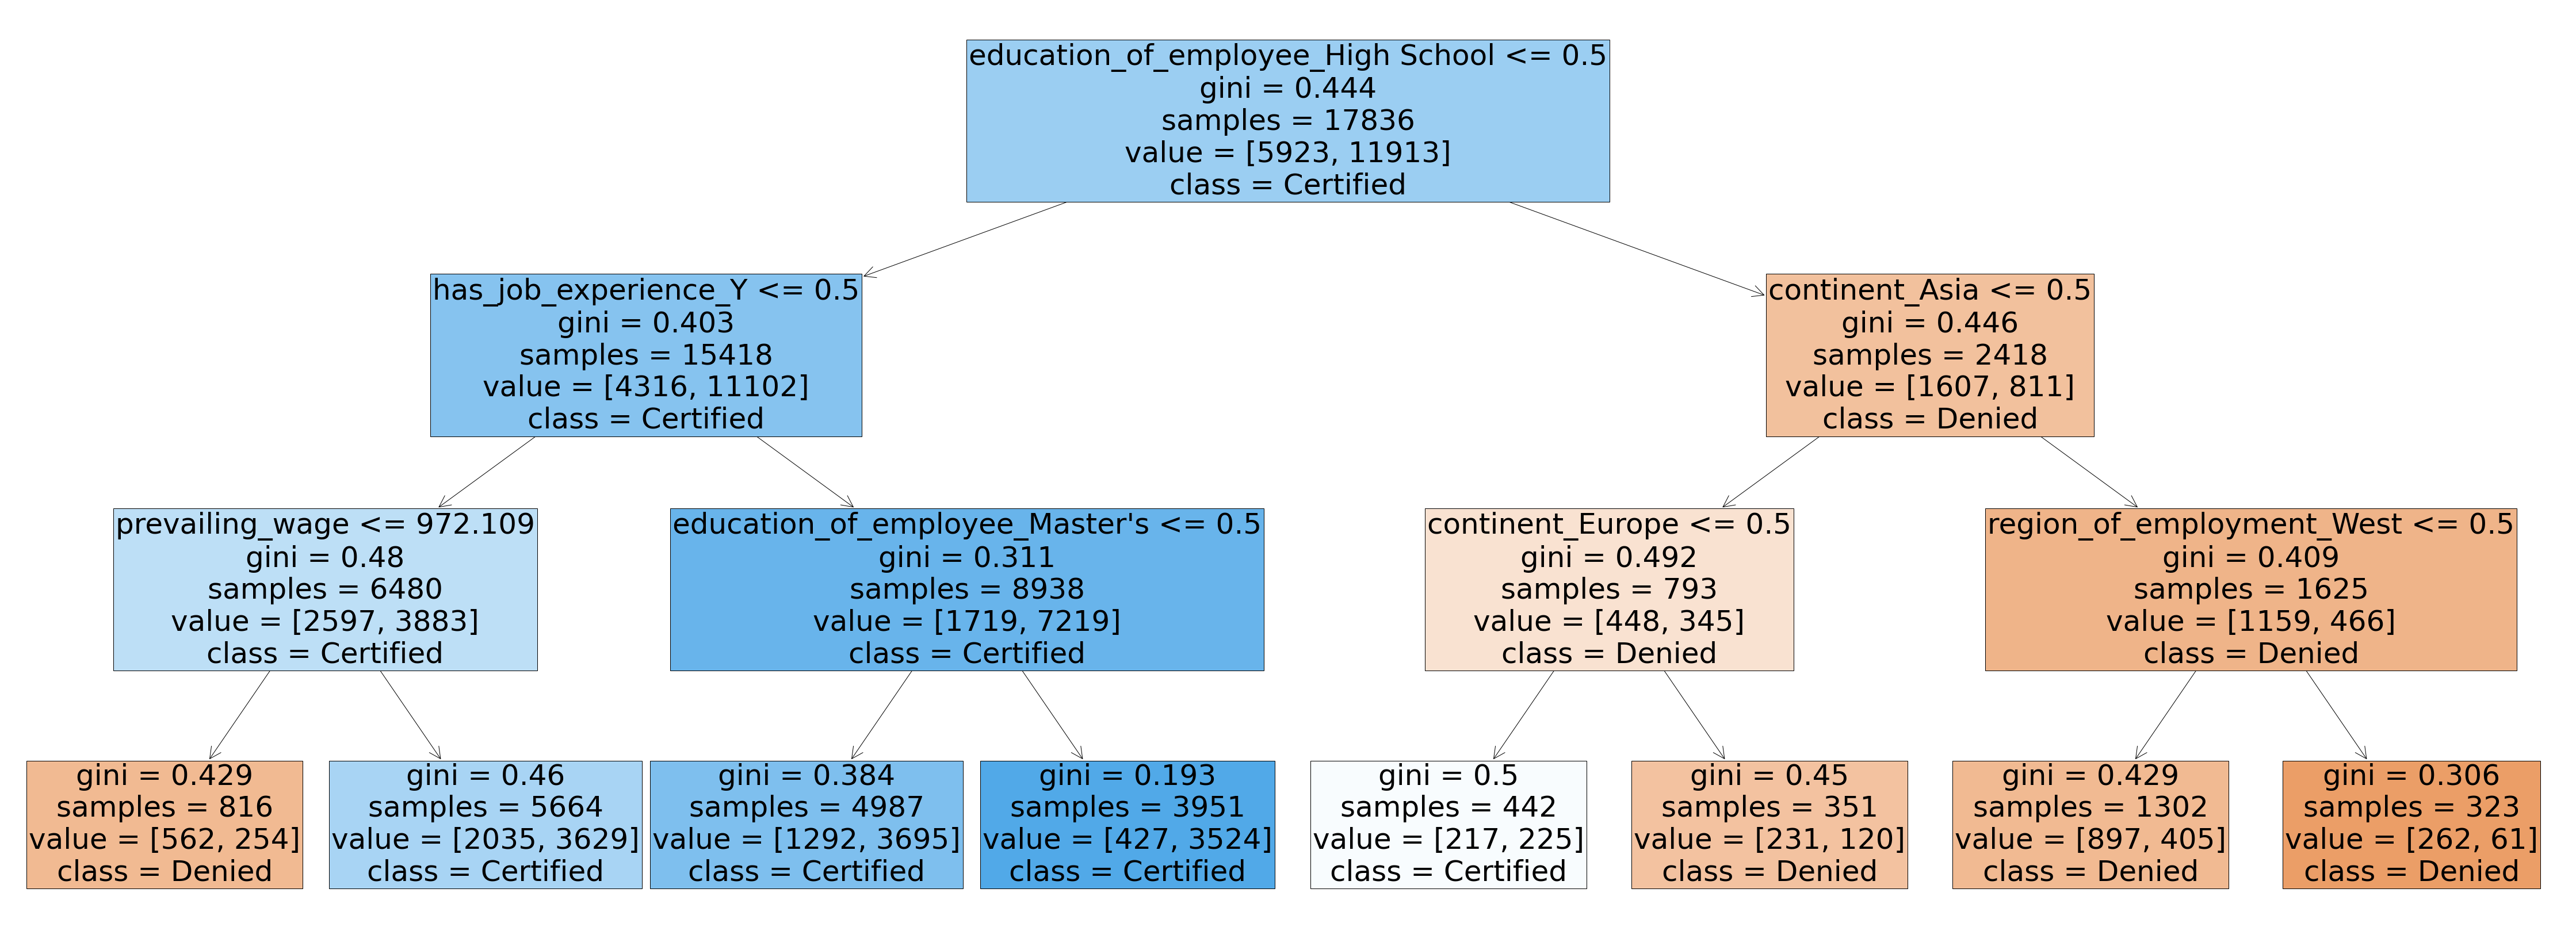

In [63]:
y_names = ['Denied','Certified']
fig = plt.figure(figsize=(80,30))
out = tree.plot_tree(decision_tree,feature_names=feature_names,fontsize = 50, class_names=y_names, filled=True) # _ stops annotations print-out

In [64]:
# Text report showing the rules of the decision tree - 
print(tree.export_text(decision_tree, feature_names = feature_names, show_weights = True))

|--- education_of_employee_High School <= 0.50
|   |--- has_job_experience_Y <= 0.50
|   |   |--- prevailing_wage <= 972.11
|   |   |   |--- weights: [562.00, 254.00] class: 0
|   |   |--- prevailing_wage >  972.11
|   |   |   |--- weights: [2035.00, 3629.00] class: 1
|   |--- has_job_experience_Y >  0.50
|   |   |--- education_of_employee_Master's <= 0.50
|   |   |   |--- weights: [1292.00, 3695.00] class: 1
|   |   |--- education_of_employee_Master's >  0.50
|   |   |   |--- weights: [427.00, 3524.00] class: 1
|--- education_of_employee_High School >  0.50
|   |--- continent_Asia <= 0.50
|   |   |--- continent_Europe <= 0.50
|   |   |   |--- weights: [217.00, 225.00] class: 1
|   |   |--- continent_Europe >  0.50
|   |   |   |--- weights: [231.00, 120.00] class: 0
|   |--- continent_Asia >  0.50
|   |   |--- region_of_employment_West <= 0.50
|   |   |   |--- weights: [897.00, 405.00] class: 0
|   |   |--- region_of_employment_West >  0.50
|   |   |   |--- weights: [262.00, 61.00] cla

This better visualised tree explains that where an employee (visa applicant) has no High school education, has no job experience, and it's prevailing wage is less than 972.11, the visa gets denied.
Likewise, an employee that has High school, has job experience and has a Master's degree gets their visa Certified. Also, an employee that has High School degree, and is not from Continent Europe, or from continent Asia, gets it's visa Certified, and so on

### Hyperparameter Tuning - Decision Tree

In [65]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    dtree_estimator, parameters, scoring=scorer, cv=5, n_jobs=-1, verbose=2
)  # Run grid search with n_jobs = -1

grid_obj = grid_obj.fit(
    X_train, y_train
)  # Fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

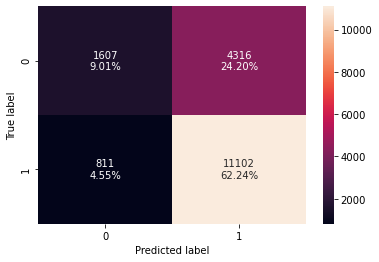

In [66]:
confusion_matrix_sklearn(
    dtree_estimator, X_train, y_train
)  # Create confusion matrix for train data on tuned estimator

In [67]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)  # Check performance for train data on tuned estimator
print("Training performance \n", dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


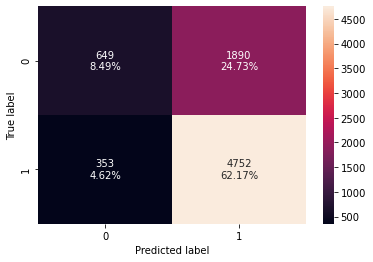

In [68]:
confusion_matrix_sklearn(
    dtree_estimator, X_test, y_test
)  # Create confusion matrix for test data on tuned estimator

In [69]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)  # Check performance for test data on tuned estimator
print("Testing performance \n", dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


- The overfitting is reduced after hyperparameter tuning and the model is giving a better generalised result now
- F1 score is also giving a better performance on the tuned model than the default parameter model

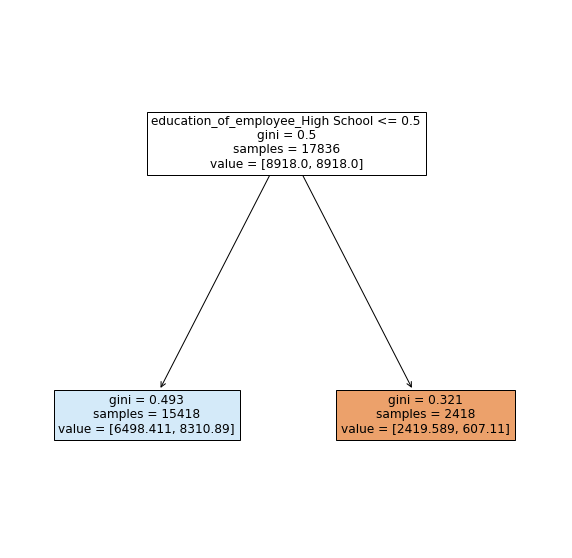

In [70]:
fig = plt.figure(figsize=(10,10))
out = tree.plot_tree(dtree_estimator,feature_names=feature_names,class_names=None,filled=True) 

In [71]:
# Text report showing the rules of the decision tree - 
print(tree.export_text(dtree_estimator, feature_names = feature_names, show_weights = True))

|--- education_of_employee_High School <= 0.50
|   |--- weights: [6498.41, 8310.89] class: 1
|--- education_of_employee_High School >  0.50
|   |--- weights: [2419.59, 607.11] class: 0



##### Observations:    
  From the hyperparameter tuned classifier, it shows that the most important feature in the model remains education of employee_High school

### Bagging Classifier

In [72]:
bagging_classifier = BaggingClassifier(
    random_state=1
)  # To define bagging classifier with random state = 1
bagging_classifier.fit(
    X_train, y_train
)  # To fit bagging classifier on the train data

BaggingClassifier(random_state=1)

#### Checking model performance on training set

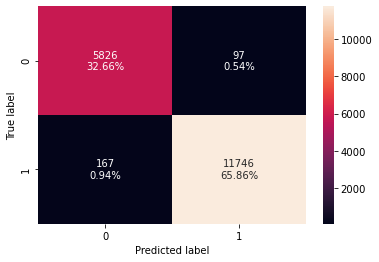

In [73]:
confusion_matrix_sklearn(
    bagging_classifier, X_train, y_train
)  # Create confusion matrix for train data

In [74]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)  # Check performance on train data
print("Training performance \n", bagging_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


#### Checking model performance on test set

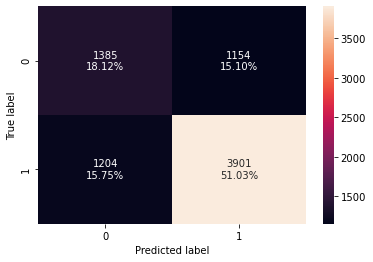

In [75]:
confusion_matrix_sklearn(
    bagging_classifier, X_test, y_test
)  # Create confusion matrix for test data

In [76]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)  # Check performance for test data
print("Testing performance \n", bagging_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


Bagging classifier is overfitting on the training set and is performing poorly on the test set for all metrics including F1

### Hyperparameter Tuning - Bagging Classifier

In [77]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1
)  # To run grid search with cv = 5
grid_obj = grid_obj.fit(
    X_train, y_train
)  # To fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set

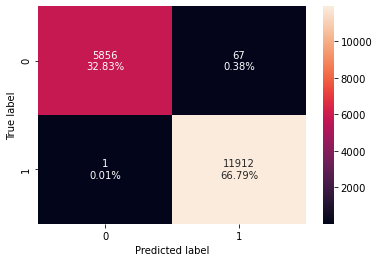

In [78]:
confusion_matrix_sklearn(
    bagging_estimator_tuned, X_train, y_train
)  # Create confusion matrix for train data on tuned estimator

In [79]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)  # To check performance for train data on tuned estimator
print("Training performance \n", bagging_estimator_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.996187  0.999916   0.994407  0.997154


#### Checking model performance on test set

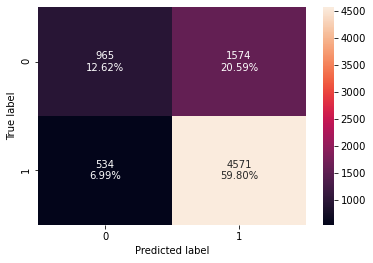

In [80]:
confusion_matrix_sklearn(
    bagging_estimator_tuned, X_test, y_test
)  # To create confusion matrix for test data on tuned estimator

In [81]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)  # To check performance for test data on tuned estimator
print("Testing performance \n", bagging_estimator_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.724228  0.895397   0.743857  0.812622


- Performance has generally increased across all metrics but the model is not generalising well, and the tuned bagging classifier model is still overfitting
- The train Accuracy, Recall, Precision and F1 for the Bagging classifier have increased slightly after hyperparameter tuning but the test Precision has decreased
- The model is overfitting the data, as train metrics are much higher than test metrics
- The confusion matrix shows that the model is better at identifying certified visas than denied visas

### Random Forest

In [82]:
# Fitting the model
rf_estimator = RandomForestClassifier(
    class_weight="balanced", random_state=1
)  # Define random forest with random state = 1 and class_weight = balanced
rf_estimator.fit(
    X_train, y_train
)  # Fit random forest on the train data

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

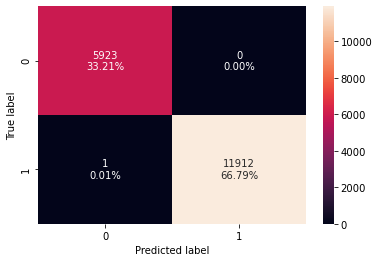

In [83]:
confusion_matrix_sklearn(
    rf_estimator, X_train, y_train
)  # Create confusion matrix for train data

In [84]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)  # Check performance on train data
print("Training performance \n", rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


#### Checking model performance on test set

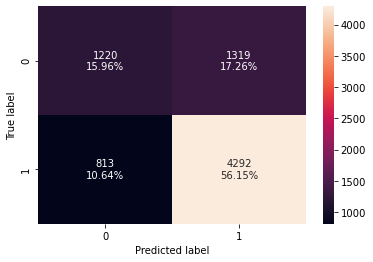

In [85]:
confusion_matrix_sklearn(
    rf_estimator, X_test, y_test
)  # Create confusion matrix for test data

In [86]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)  # Check performance for test data
print("Testing performance \n", rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.721088  0.840744   0.764926  0.801045


- Random forest is overfitting the train data
- Model is performing fairly but generalising poorly

### Hyperparameter Tuning - Random Forest

In [87]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1, verbose=2
)  # To run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(
    X_train, y_train
)  # To fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

#### Checking model performance on training set

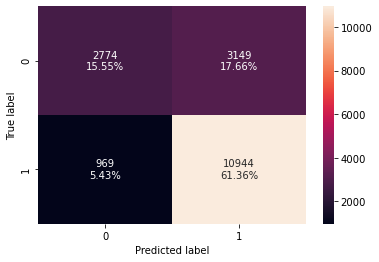

In [88]:
confusion_matrix_sklearn(
    rf_tuned, X_train, y_train
)  # Create confusion matrix for train data on tuned estimator

In [89]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)  # Check performance for train data on tuned estimator
print("Training performance \n", rf_tuned_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.769119  0.91866   0.776556  0.841652


#### Checking model performance on test set

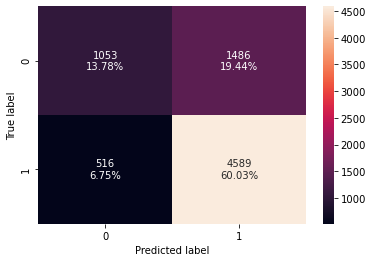

In [90]:
confusion_matrix_sklearn(
    rf_tuned, X_test, y_test
)  # Create confusion matrix for test data on tuned estimator

In [91]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)  # Check performance for test data on tuned estimator
print("Testing performance \n", rf_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.738095  0.898923   0.755391  0.82093


- The tuned random forest model has performed only slightly better than the untuned (with default parameters) random forest
- The tuned random forest is however generalising better as there is little or no overfitting
- the F1 score has also improved 

### AdaBoost Classifier

In [92]:
ab_classifier = AdaBoostClassifier(
    random_state=1
)  # Define AdaBoost Classifier with random state = 1
ab_classifier.fit(
    X_train, y_train
)  # Fit AdaBoost Classifier on the train data

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

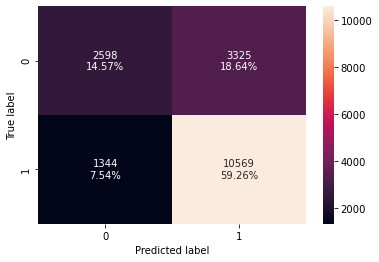

In [93]:
confusion_matrix_sklearn(
    ab_classifier, X_train, y_train
)  # Create confusion matrix for train data

In [94]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)  # Check performance on train data
print("Training performance \n", ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


#### Checking model performance on test set

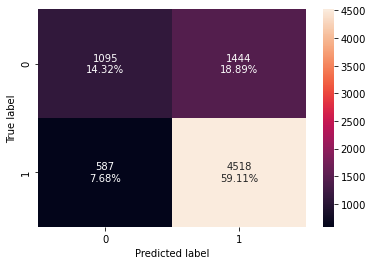

In [95]:
confusion_matrix_sklearn(
    ab_classifier, X_test, y_test
)  # Create confusion matrix for test data

In [96]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)  # Check performance for test data
print("Testing performance \n", ab_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


AdaBoost is generalizing well and giving a good performance Recall and F1

### Hyperparameter Tuning - AdaBoost Classifier

In [97]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Will try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    abc_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1, verbose=2
)  # To run grid search with cv = 5
grid_obj = grid_obj.fit(
    X_train, y_train
)  # To fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking model performance on training set

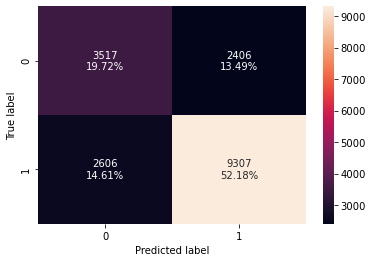

In [98]:
confusion_matrix_sklearn(
    abc_tuned, X_train, y_train
)  # Create confusion matrix for train data on tuned estimator

In [99]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)  # Check performance for train data on tuned estimator
print("Training performance \n", abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.718995  0.781247   0.794587  0.787861


#### Checking model performance on test set

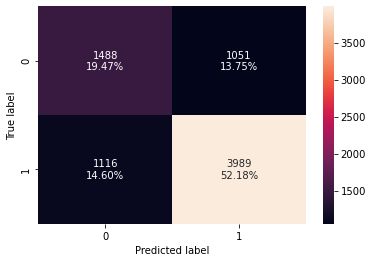

In [100]:
confusion_matrix_sklearn(
    abc_tuned, X_test, y_test
)  # Create confusion matrix for test data on tuned estimator

In [101]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)  # Check performance for test data on tuned estimator
print("Testing performance \n", abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.71651  0.781391   0.791468  0.786397


- There is no significant improvement in the model after tuning in terms of overfitting. The model generalises well on test data and is not overfitting the train data
- The performance on Accuracy, Recall and F1 decreased slightly

### Gradient Boosting Classifier

In [102]:
gb_classifier = GradientBoostingClassifier(random_state=1)  # Define Gradient Boosting Classifier with random state = 1
gb_classifier.fit(X_train, y_train)  #Fit Gradient Boosting Classifier on the train data

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

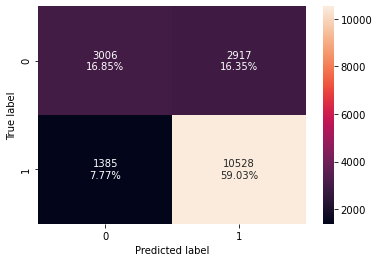

In [103]:
confusion_matrix_sklearn(
    gb_classifier, X_train, y_train
)  # Create confusion matrix for train data

In [104]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)  # Check performance on train data
print("Training performance \n", gb_classifier_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


#### Checking model performance on test set

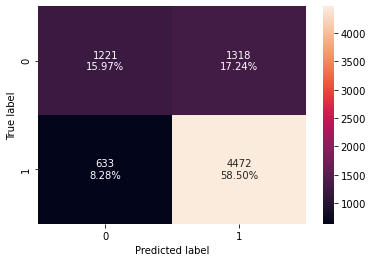

In [105]:
confusion_matrix_sklearn(
    gb_classifier, X_test, y_test
)  # Create confusion matrix for test data

In [106]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)  # Check performance for test data
print("Testing performance \n", gb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


- The Gradient Boost classifier is generalising well and no overfitting on train data
- The model is performing better on Recall and F1 than Accuracy and Precision

### Hyperparameter Tuning - Gradient Boosting Classifier

In [107]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    gbc_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1, verbose=2
)  # To run grid search with cv = 5
grid_obj = grid_obj.fit(
    X_train, y_train
)  # To fit the grid_obj on train data

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking model performance on training set

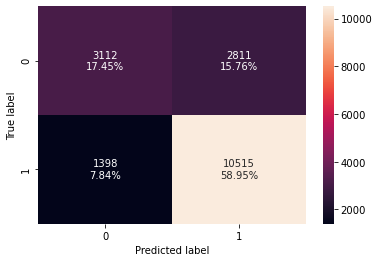

In [108]:
confusion_matrix_sklearn(
    gbc_tuned, X_train, y_train
)  # Create confusion matrix for train data on tuned estimator

In [109]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)  # Check performance for train data on tuned estimator
print("Training performance \n", gbc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.764017  0.882649   0.789059  0.833234


#### Checking model performance on test set

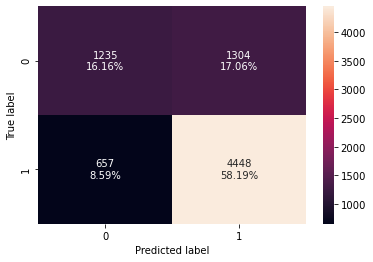

In [110]:
confusion_matrix_sklearn(
    gbc_tuned, X_test, y_test
)  # Create confusion matrix for test data on tuned estimator

In [111]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)  # Check performance for test data on tuned estimator
print("Testing performance \n", gbc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.743459  0.871303   0.773296  0.819379


- There is no significant performance difference in the tuned GBC model against the untuned Gradient Boosting Classifier
- The model still generalises well and no overfitting of train data
- the F1 score has dropped slightly compared to the default GBC

### Conclusion

**Comparing all models**

In [112]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
       
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,0.999944,0.769119,0.738226,0.718995,0.758802,0.764017
Recall,1.0,0.931923,0.985982,0.999916,0.999916,0.918660,0.887182,0.781247,0.883740,0.882649
Precision,1.0,0.720067,0.991810,0.994407,1.000000,0.776556,0.760688,0.794587,0.783042,0.789059
F1,1.0,0.812411,0.988887,0.997154,0.999958,0.841652,0.819080,0.787861,0.830349,0.833234


In [113]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    
]
print("Testing performance comparison:")
models_test_comp_df  # Check performance for test data

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,0.650968,0.706567,0.691523,0.724228,0.721088,0.738095,0.734301,0.716510,0.744767,0.743459
Recall,0.729285,0.930852,0.764153,0.895397,0.840744,0.898923,0.885015,0.781391,0.876004,0.871303
Precision,0.743262,0.715447,0.771711,0.743857,0.764926,0.755391,0.757799,0.791468,0.772366,0.773296
F1,0.736207,0.809058,0.767913,0.812622,0.801045,0.820930,0.816481,0.786397,0.820927,0.819379


- The top 3 models with similar F1 performances are the Gradient Boost Classifier, Tuned Random forest and Tuned Adaboost Classifier

Of all 3:
- The model with the best performance is the Tuned Random forest followed by Gradient Boost and then Tuned Adaboost Classifiers
- The model with the best generalisation (least overfitting) is the Gradient Boost, then Tuned Adaboost and then Tuned Random Forest

I will take the Gradient Boost Classifier as the overall best model. It has an F1 score of approx 0.82, Accuracy of 0.74, Recall 0.88 and Precision of 0.77

### Important features of the final model

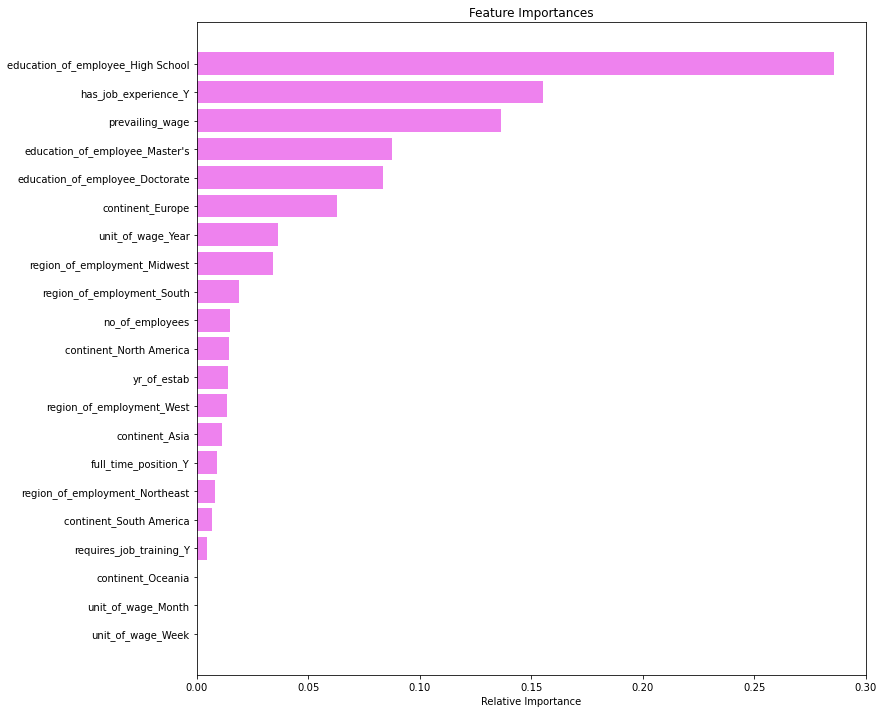

In [114]:
# checking the important features based on the selected overall best model (Gradient Boost)
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Looking at the feature importance of the gradient Boost classifier, the top three important features to look out for while certifying a visa are:
* Employees with High school education is the most important feature, followed by employees with job experience and then prevailing wage.


### Recommendations

##### The profile of the applicants for whom the visa status can be approved:

- Primary information to look at:

Education level - At least has a Bachelor's degree - Master's and doctorate are preferred.

Job Experience - Should have some job experience.

Prevailing wage - The median prevailing wage of the employees for whom the visa got certified is around 72,000.

- Secondary information to look at:

Unit of Wage - Applicants having a yearly unit of wage.

Continent - Ideally the nationality and ethnicity of an applicant shouldn't matter to work in a country but previously it has been observed that applicants from Europe, Africa, and Asia have higher chances of visa certification.

Region of employment - This analysis suggests that the applications to work in the Mid-West region have more chances of visa approval. The approvals can also be made based on requirement of talent, from the analysis it is observed that:

The requirement for the applicants who have passed high school is most in the South region, followed by Northeast region.

The requirement for Bachelor's is mostly in South region, followed by West region.

The requirement for Master's is most in Northeast region, followed by South region.

The requirement for Doctorate's is mostly in West region, followed by Northeast region.

##### The profile of the applicants for whom the visa status can be denied:

- Primary information to look at:

Education level - Doesn't have any degree and has completed high school.

Job Experience - Doesn't have any job experience.

Prevailing wage - The median prevailing wage of the employees for whom the visa got certified is around 65k.

- Secondary information to look at:

Unit of Wage - Applicants having an hourly unit of wage.

Continent - Ideally the nationality and ethnicity of an applicant shouldn't matter to work in a country but previously it has been observed that applicants from South America, North America, and Oceania have higher chances of visa applications getting denied.

Additional information of employers and employees can be collected to gain better insights. Information such as:

Employers: Information about the wage they are offering to the applicant, Sector in which company operates in, etc

Employee's: Specialization in their educational degree, Number of years of experience, etc